<img src=docs/tudelft_logo.jpg width=50%>

## Data-driven Design and Analyses of Structures and Materials (3dasm)

## Lecture 8

### Miguel A. Bessa | <a href = "mailto: M.A.Bessa@tudelft.nl">M.A.Bessa@tudelft.nl</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* [Car figure](https://korkortonline.se/en/theory/reaction-braking-stopping/)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the 3dasm conda environment (see Lecture 1).

2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
conda activate 3dasm
jupyter notebook
```
4. Open notebook of this Lecture.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.style.use("seaborn") # style for plotting that comes from seaborn
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Parameter estimation from training with data (model fitting)
    - Posterior approximation by Dirac delta "distribution"
    - Point estimates for the Dirac delta "distribution"
        * MAP: Maximum A Posterior estimate
        * MLE: Maximum Likelihood Estimation 
    - Negative log likelihood (NLL) 
* Why some people do not adopt a Bayesian (probabilistic) perspective of ML

**Reading material**: This notebook + Chapter 4

## Summary of past lectures

Bayesian inference:
* predicts a **quantity of interest** (e.g. $y$) while treating **unknown** information as rv's (e.g. $z$)

* it is based on establishing a model (observation distribution + prior) and evaluating it on data (joint likelihood normalized by marginal likelihood) to update our belief about the unknown (posterior)

* from the posterior, we can then predict a distribution for the quantity of interest (the PPD) that results from marginalizing (integrating out) the unknown

### The good and the bad

In short: Bayesian inference results from interpreting the unknown as rv's of a model, and then evaluating the impact of all possible values of the rv's (within the constraints imposed by the model!) by marginalizing them (integrating them out).

* **The good**: This is powerful because even if our assumptions are wrong, we can at least take different values for the rv's and their respective impact on the predictions. This alleviates problems such as overfitting and overconfidence, that we will encounter in the remaining of the course.

* **The bad**: Bayesian inference can be difficult. We solved one of the simplest problems in the last lectures, and we saw that those integrals are a bit ugly...
    - In most cases, the integrals (to compute the marginal likelihood, and the PPD) cannot even be solved analytically.
    - Numerical strategies exist to approximate the integration, but they tend to be **slow when accurate** or **fast but innacurate** (a dangerous generalization: forgive me Bayesians!)

**Very Important Question (VIQ)**: What if we don't calculate these integrals at all?

## Machine Learning without going fully Bayesian

Avoiding integration is possible by noting that:

1. Computing the PPD is trivial if the **posterior distribution becomes the Dirac delta**


2. The marginal likelihood is just a **constant**

Let's explore these two remarks.

### 1. PPD when the posterior is a Dirac delta

$$\require{color}
{\color{orange}p(y|\mathcal{D}_y)} = \int \underbrace{p(y|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz
$$

What happens if the posterior is the Dirac delta "distribution"?

$$
p(z|y=\mathcal{D}_y) = \delta(z-\hat{z})
$$

where $\hat{z}$ is our best estimate for the value that $z$ should have.

$$\require{color}
\begin{align}
{\color{orange}p(y|\mathcal{D}_y)} &= \int \underbrace{p(y|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz\\
&= \int p(y|z) \delta(z-\hat{z}) dz \\
&= p(y|z=\hat{z})
\end{align}
$$

**Conclusion**: The PPD becomes the **observation distribution** where the unknown $z$ becomes our **best estimate** $\hat{z}$ (in other words: $z = \hat{z} =$ const)

* But what is our "**best estimate**" $\hat{z}$?
    - There are different estimates and different strategies to get there!

### 2. Finding the "best estimate" $\hat{z}$ without computing the marginal likelihood

Remember: the Bayes' rule determines the <font color='green'>posterior</font>,

$\require{color}$
$$
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

and the marginal likelihood $p(y=\mathcal{D}_y)$ is just a constant.

If we want to reduce the <font color='green'>posterior</font> to the Dirac delta "distribution",

$$
p(z|y=\mathcal{D}_y) = \delta(z-\hat{z})
$$

what is the only parameter that we need to find?

* We just need to find $\hat{z}$ to completely characterize $\delta(z-\hat{z})$

Note that this is not the case if the <font color='green'>posterior</font> is a different distribution!

For example, we saw in the previous lectures that the posterior for the car stopping distance problem was a **Gaussian**.

* How many parameters do you need to characterize the Gaussian distribution?

Indeed... Two!

And if the posterior distribution is more complicated, you may need a lot more parameters! In some cases, the posterior does not even have an analytical description!

Anyway, the question still remains: what should be the value $\hat{z}$?

Let's go back to the two problems we have seen in Lecture 6 and Lecture 7.

Recall our reflection on the differences between the posterior for the two priors we used.

* When using the noninformative Uniform prior $p(z) = \frac{1}{C_z}$ (Lecture 6):

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)}
&= \mathcal{N}(z|\mu, \sigma^2)
\end{align}
$$

* When using a Gaussian prior $p(z) = \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z, \overset{\scriptscriptstyle <}{\sigma}_z^2\right)$ (Lecture 7):

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)} &= \mathcal{N}\left(z| \overset{\scriptscriptstyle >}{\mu}_z, \overset{\scriptscriptstyle >}{\sigma}_z^2\right) = \mathcal{N}\left(z\left|\frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right), \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}}\right.\right)
\end{align}
$$

The posterior is still a Gaussian but its mean and variance have been updated by the influence of the prior!

Let's play a simple game:
* Choose where to place the Dirac delta "distribution" for those two posteriors we found before.

In [2]:
# This cell is hidden during the presentation
from scipy.stats import norm # import the normal dist, as we learned before!
def samples_y_with_2rvs(N_samples,x): # observations/measurements/samples for car stop. dist. prob. with 2 rv's
    mu_z1 = 1.5; sigma_z1 = 0.5;
    mu_z2 = 0.1; sigma_z2 = 0.01;
    samples_z1 = norm.rvs(mu_z1, sigma_z1, size=N_samples) # randomly draw samples from the normal dist.
    samples_z2 = norm.rvs(mu_z2, sigma_z2, size=N_samples) # randomly draw samples from the normal dist.
    samples_y = samples_z1*x + samples_z2*x**2 # compute the stopping distance for samples of z_1 and z_2
    return samples_y # return samples of y

In [3]:
# This cell is hidden during the presentation

# -------------------------------------------------------------------------------
# PARAMETERS YOU CAN CHANGE! PLAY A BIT WITH THIS ;)
x = 75 # keeping the car velocity constant at 75 m/s as we have done before
mu_z2 = 0.1; sigma_z2 = 0.01 # parameters of z_2 distribution
N_samples = 3 # Let's say our data is composed of 3 samples (empirical observations)
mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution (used only in case 2)
# -------------------------------------------------------------------------------


empirical_y = samples_y_with_2rvs(N_samples, x) # Our data (empirical measurements of N_samples at x=75)

# Compute all the constants needed to plot the posterior for Lecture 6 and for Lecture 7
w = x
b = mu_z2*x**2
sigma_yGIVENz = np.sqrt((x**2*sigma_z2)**2) # sigma_y|z (comes from the stochastic influence of the z_2 rv)
# Empirical mean and std directly calculated from observations:
empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); 
#
# Parameters of the likelihood function (not a distribution because it is not normalized):
sigma = np.sqrt(sigma_yGIVENz**2/(w**2*N_samples)) # std arising from the likelihood
mu = empirical_mu_y/w - b/w # mean arising from the likelihood (product of Gaussian densities for the data)
# -------------------------------------------------------------------------------
# Case 1: using a noninformative Uniform prior (Lecture 6):
# Posterior parameters:
#    These parameters are obvious in this case but I just want to highlight that the mean and std of this posterior
#    are the same as the parameters of the likelihood because posterior = likelihood / const )
sigma_posterior_UniformPrior = sigma # std of posterior (same as likelihood)
mu_posterior_UniformPrior = mu # mean of posterior (same as likelihood)
#
# PPD parameters:
PPD_mu_y_UniformPrior = mu*w + b # same result if using: np.mean(empirical_y)
PPD_sigma_y_UniformPrior = np.sqrt(w**2*sigma**2+sigma_yGIVENz**2) # same as: np.sqrt((x**2*sigma_z2)**2*(1/N_samples + 1))

# z values for plot of case 1:
zrange_case1 = np.linspace(-3*sigma_posterior_UniformPrior+mu_posterior_UniformPrior,
                            3*sigma_posterior_UniformPrior+mu_posterior_UniformPrior, 200)
# Posterior values for plot of case 1:
posterior_pdf_values_case1 = norm.pdf(zrange_case1, mu, sigma)
# Probability density of posterior at the mean for case 1:
pdf_at_mean_case1 =  norm.pdf(mu_posterior_UniformPrior,mu_posterior_UniformPrior,sigma_posterior_UniformPrior)
# MAP estimate (maximum a posterior estimate) is the same as MLE (maximum likelihood estimation) for case 1:
pdf_at_mode_case1 = pdf_at_mean_case1 # in this case it's the same as mean (no calculation needed)
# -------------------------------------------------------------------------------
#
# -------------------------------------------------------------------------------
# CASE 2: using a Gaussian prior (Lecture 7):
# Posterior parameters:
sigma_posterior_GaussianPrior = np.sqrt( (sigma_prior_z**2*sigma**2)/(sigma_prior_z**2+sigma**2) )# std of posterior
mu_posterior_GaussianPrior = sigma_posterior_GaussianPrior**2*(mu/(sigma**2)+mu_prior_z/(sigma_prior_z**2)) # mean of posterior
# PPD parameters:
PPD_mu_y_GaussianPrior = mu_posterior_GaussianPrior*w + b
PPD_sigma_y_GaussianPrior = np.sqrt(w**2*sigma_posterior_GaussianPrior**2+sigma_yGIVENz**2)
#
# z values for plot:
zrange_case2 = np.linspace(-3*sigma_posterior_GaussianPrior+mu_posterior_GaussianPrior,
                            3*sigma_posterior_GaussianPrior+mu_posterior_GaussianPrior, 200)
# Posterior values for plot of case 2:
posterior_pdf_values_case2 = norm.pdf(zrange_case2, mu_posterior_GaussianPrior,
                                      sigma_posterior_GaussianPrior) # values of posterior for plotting
# Probability density of posterior at the mean for case 2:
pdf_at_mean_case2 = norm.pdf(mu_posterior_GaussianPrior,mu_posterior_GaussianPrior,sigma_posterior_GaussianPrior)
# MAP estimate (maximum a posterior estimate) for case 2:
pdf_at_mode_case2 = pdf_at_mean_case2 # in this case it's the same as mean (no calculation needed)
# -------------------------------------------------------------------------------
    

# Plot the posteriors that we calculate above and the Dirac delta at different z_hat
def Posteriors_and_Dirac_delta(z_hat_case1=mu_posterior_UniformPrior-2*sigma_posterior_UniformPrior,
                               z_hat_case2=mu_posterior_GaussianPrior-2*sigma_posterior_GaussianPrior):
    fig_Dirac, (ax_case1, ax_case2) = plt.subplots(1,2)
    #
    ax_case1.plot(zrange_case1, posterior_pdf_values_case1,
                  label=r"Posterior: $p(z|\mathcal{D}_y) = \mathcal{N}\left(z| \mu, \sigma^2\right)$")
    ax_case1.set_ylim(0, 1.3*pdf_at_mode_case1)
    ax_case1.plot(mu_posterior_UniformPrior, pdf_at_mean_case1,
                  'g^', markersize=25, linewidth=2,
                  label=r'mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)=\mu$')
    ax_case1.plot(mu_posterior_UniformPrior, pdf_at_mode_case1,
                  'k*', markersize=20, linewidth=2,
                  label=r'mean: $\mathbb{E}[z|\mathcal{D}_y]=\mu$')
    ax_case1.annotate("",
            xy=(z_hat_case1, 0), xycoords='data',
            xytext=(z_hat_case1, 1.3*pdf_at_mode_case1), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax_case1.text(z_hat_case1, pdf_at_mode_case1*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax_case1.text(z_hat_case1, 0, ('$\hat{z}=%1.2f$' % z_hat_case1), fontsize = 15)
    ax_case1.set_xlabel("z", fontsize=20)
    ax_case1.set_ylabel("probability density", fontsize=20)
    ax_case1.legend(fontsize=15)
    ax_case1.set_title("Posterior using noninformative Uniform prior (Lecture 6)", fontsize=20)
    #
    ax_case2.plot(zrange_case2, posterior_pdf_values_case2,
                  label=r"Posterior: $p(z|\mathcal{D}_y) = \mathcal{N}\left(z| \overset{>}{\mu}_z, \overset{>}{\sigma}_z^2\right)$")
    
    ax_case2.set_ylim(0, 1.3*pdf_at_mode_case2)
    ax_case2.plot(mu_posterior_GaussianPrior, pdf_at_mean_case2,
                  'g^', markersize=25, linewidth=2,
                  label=r'mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)=\overset{>}{\mu}_z$')
    ax_case2.plot(mu_posterior_GaussianPrior, pdf_at_mean_case2,
                  'k*', markersize=20, linewidth=2,
                  label=r'mean: $\mathbb{E}[z|\mathcal{D}_y]=\overset{>}{\mu}_z$')
    ax_case2.annotate("",
            xy=(z_hat_case2, 0), xycoords='data',
            xytext=(z_hat_case2, 1.3*pdf_at_mode_case2), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax_case2.text(z_hat_case2, pdf_at_mode_case2*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax_case2.text(z_hat_case2, 0, ('$\hat{z}=%1.2f$' % z_hat_case2), fontsize = 15)
    ax_case2.set_xlabel("z", fontsize=20)
    ax_case2.set_ylabel("probability density", fontsize=20)
    ax_case2.legend(fontsize=15)
    ax_case2.set_title("Posterior using Gaussian prior (Lecture 7)", fontsize=20)
    fig_Dirac.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)

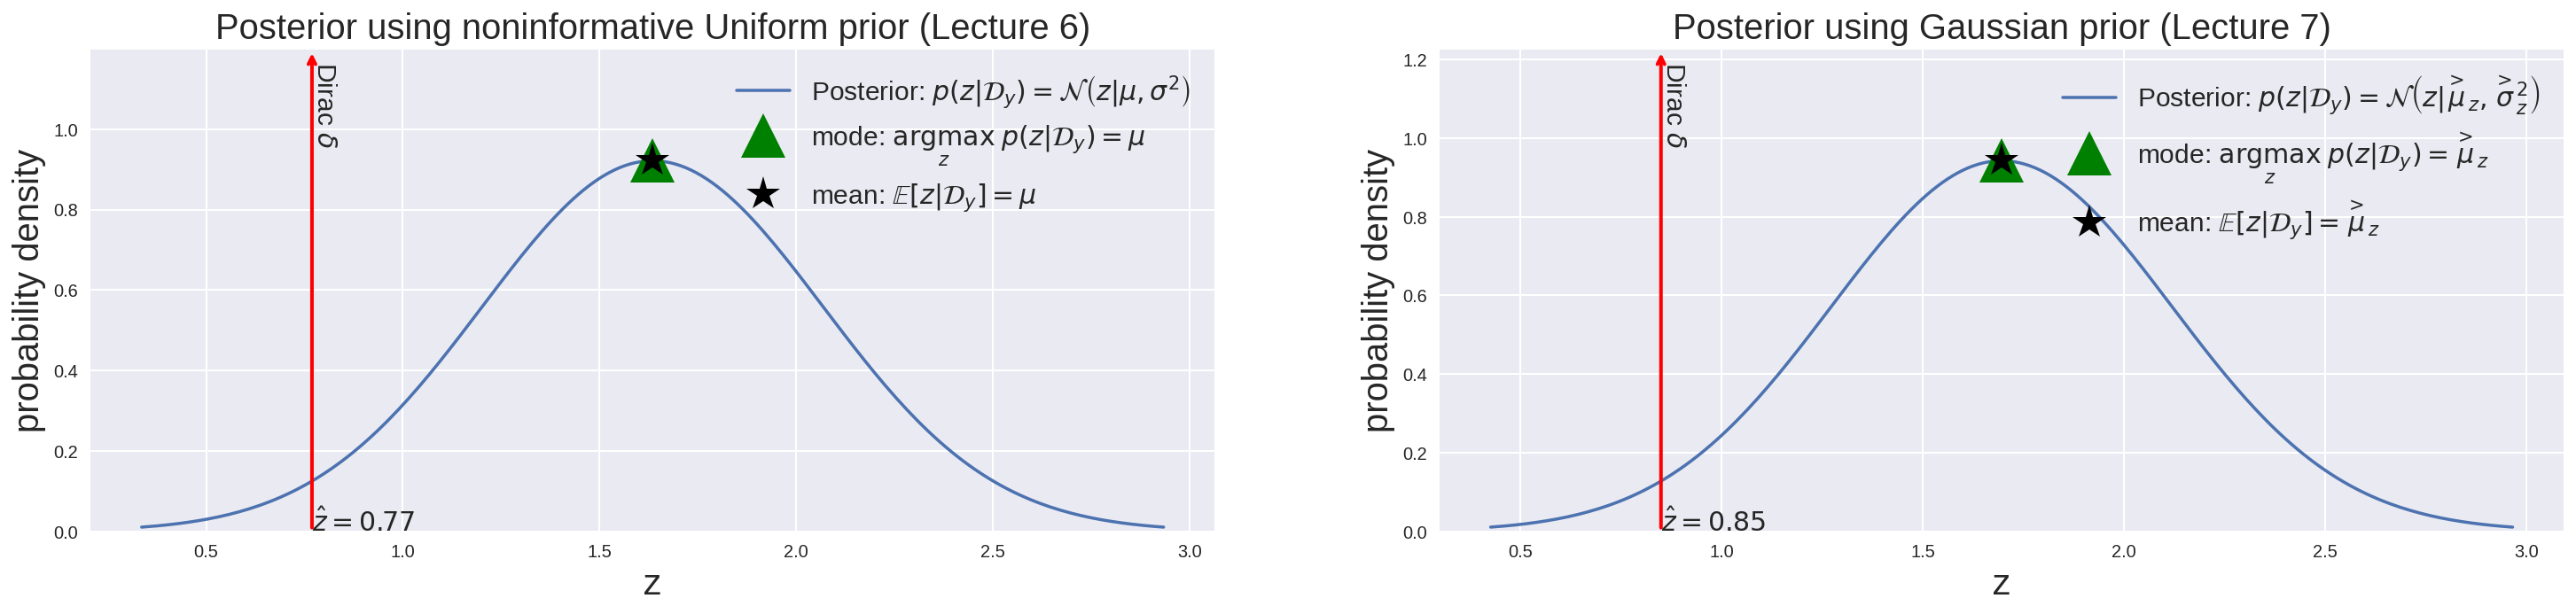

In [4]:
# Static plot (I skip this cell in presentations, but use it when printing slides to PDF)
Posteriors_and_Dirac_delta(z_hat_case1=mu_posterior_UniformPrior-2*sigma_posterior_UniformPrior,
                           z_hat_case2=mu_posterior_GaussianPrior-2*sigma_posterior_GaussianPrior)

In [5]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
from ipywidgets import interactive # so that we can interact with the plot
interactive_plot = interactive(Posteriors_and_Dirac_delta,
                       z_hat_case1=(min(zrange_case1), max(zrange_case1), 6/10*sigma_posterior_UniformPrior),
                       z_hat_case2=(min(zrange_case2), max(zrange_case2), 6/10*sigma_posterior_GaussianPrior) )
interactive_plot

interactive(children=(FloatSlider(value=0.7691369341240086, description='z_hat_case1', max=2.9342004435851052,…

Probably you didn't hesitate to place the Dirac delta "distribution" at the mean or mode (they are the same for a Gaussian distribution)!

What if the Posterior distribution is something else? For example, a Gamma distribution

In [6]:
# This cell is hidden during the presentation

# You may recall that we plotted the Gamma distribution in Lecture 1
# -------------------------------------------------------------------------------
# PARAMETERS YOU CAN CHANGE! PLAY A BIT WITH THIS ;)
x = 75 # keeping the car velocity constant at 75 m/s as we have done before
mu_z2 = 0.1; sigma_z2 = 0.01 # parameters of z_2 distribution
N_samples = 3 # Let's say our data is composed of 3 samples (empirical observations)
mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution (used only in case 2)
# -------------------------------------------------------------------------------

from scipy.stats import gamma # import from scipy.stats the Gamma distribution
from scipy.optimize import minimize # import minimizer to calculate mode

a = 2.0 # this is the only input parameter needed for this distribution

# Define the support of the distribution (its domain) by using the
# inverse of the cdf (called ppf) to get the lowest z of the plot that
# corresponds to Pr = 0.01 and the highest z of the plot that corresponds
# to Pr = 0.99:
zrange_min = gamma.ppf(0.01, a)
zrange_max = gamma.ppf(0.99, a)
zrange = np.linspace(zrange_min, zrange_max, 200) 

mu_posterior, var_posterior = gamma.stats(2.0, moments='mv') # This computes the mean and variance of the pdf

posterior_pdf_values = gamma.pdf(zrange, a)

pdf_at_mean = gamma.pdf(mu_posterior, a)

# Finding the maximum of a function can be done by minimizing
# the negative gamma pdf. So, we create a function that outputs
# the negative of the gamma pdf given the parameter a=2.0:
def neg_gamma_given_a(z): return -gamma.pdf(z,a)

# Use the default optimizer of scipy (L-BFGS) to find the
# maximum (by minimizing the negative gamma pdf). Note
# that we need to give an initial guess for the value of z,
# so we can use, for example, z=mu_z:
mode_posterior = minimize(neg_gamma_given_a,mu_posterior).x # in general this is a vector, but for Gamma it's just a scalar

pdf_at_mode = gamma.pdf(mode_posterior, a) # in general this is a vector, but for Gamma is just a scalar

# Plot the posteriors that we calculate above and the Dirac delta at different z_hat
def Gamma_Posterior_and_Dirac_delta(z_hat=0.5):
    fig_Gamma, ax = plt.subplots()
    ax.plot(zrange, posterior_pdf_values, label=r"Posterior: $p(z|\mathcal{D}_y) = \Gamma(z|a)$")

    ax.plot(mu_posterior, pdf_at_mean, 'r*', markersize=15, linewidth=2,
            label=r'Posterior mean: $\mathbb{E}[z|\mathcal{D}_y]$')

    ax.plot(mode_posterior, pdf_at_mode[0],'g^', markersize=15,
            linewidth=2,label=r'Posterior mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)$')
    ax.annotate("",
            xy=(z_hat, 0), xycoords='data',
            xytext=(z_hat, 1.3*pdf_at_mode[0]), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax.text(z_hat, pdf_at_mode[0]*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax.text(z_hat, 0, ('$\hat{z}=%1.2f$' % z_hat) , fontsize = 15)
    ax.set_ylim(0, 1.3*pdf_at_mode[0])
    ax.set_xlabel("z", fontsize=20)
    ax.set_ylabel("probability density", fontsize=20)
    ax.legend(fontsize=15)
    ax.set_title("Posterior being a Gamma pdf for $a=2.0$", fontsize=20)

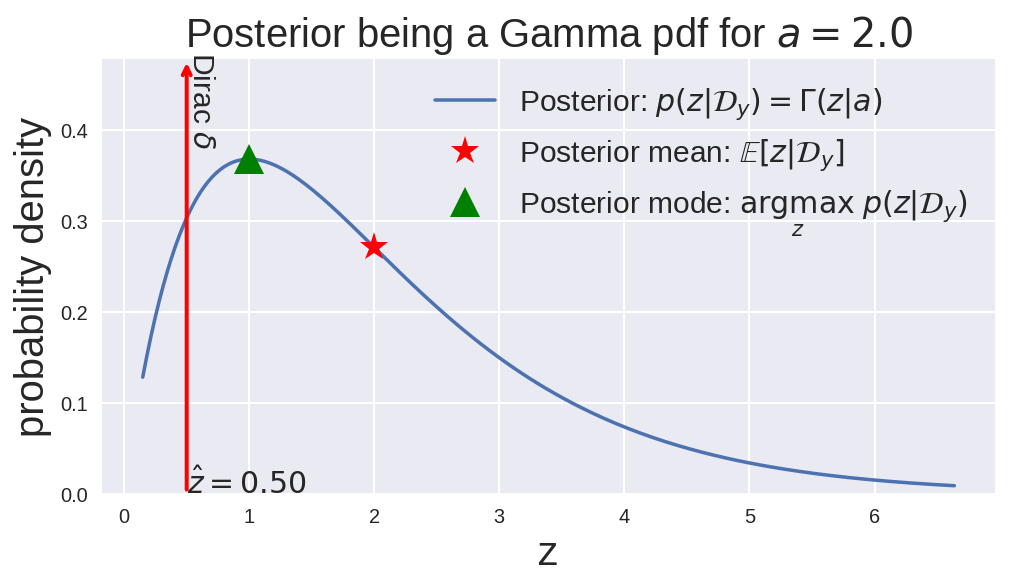

In [7]:
# Static plot (I skip this cell in presentations, but use it when printing slides to PDF)
Gamma_Posterior_and_Dirac_delta(z_hat=0.5)

In [8]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
interactive_plot = interactive(Gamma_Posterior_and_Dirac_delta,z_hat=(0.5, 6.5, 0.5 ) )
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='z_hat', max=6.5, min=0.5, step=0.5), Output()), _dom…

Maybe now you are hesitating where to place it?

Both are used in practice! And there are other estimates...

These are called **point estimates**.

* They reduce each unknown rv $z$ to a point $\hat{z}$ (transforming the posterior distribution into the Dirac delta "distribution").

Of course, as everything in life, some choices are better than others...

Common point estimates for determining $\hat{z}$:
* Maximum Likelihood Estimation (MLE):
    - You choose the mode (the maximum) of the posterior but you used a Uniform prior
* Maximum A Posterior (MAP) estimate:
    - You choose the mode (the maximum) of the posterior (and your prior is **not** Uniform)
* Posterior mean estimate (no accronym!):
    - You choose the mean of the posterior.
* ... and so on

Calculating the **Posterior mean estimate** is not new to us (see Lecture 1):

$$
\mathbb{E}[z|\mathcal{D}]= \int_{\mathcal{Z}}z p(z|\mathcal{D}) dz
$$

But I told you that today we are all about avoiding integrals!

So, let's focus on two very common point estimates: **MAP** and **MLE**.

Both are obtained by finding the **mode** of the <font color='green'>posterior</font> (i.e. maximum location in the posterior):

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; {\color{green}p(\mathcal{D}|z)}
$$

In other words, we need to solve an optimization problem.

But finding the mode of the posterior involves a few simple "tricks"...

$$\require{color}
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

#### Calculating the mode of posterior: Trick 1 (taking the $\log$)

We can separate the three terms of the <font color='green'>posterior</font> if we work with its $\log$:

$$
\log{{\color{green}p(z|y=\mathcal{D}_y)}} = \log{{\color{blue}p(y=\mathcal{D}_y|z)}} + \log{{\color{red}p(z)}} - \log{p(y=\mathcal{D}_y)}
$$

* Note: $\log$ is a monotone function, so the $\mathrm{argmax}$ of a function is the same as the $\mathrm{argmax}$ of the $\log$ of the function! Mathematically:

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; {\color{green}p(\mathcal{D}|z)} = \underset{z}{\mathrm{argmax}}\; \log{{\color{green}p(\mathcal{D}|z)}}
$$

#### Calculating the mode: Trick 2 (maximizing by minimizing the negative $\log$)

**Maximizing a function** is the same as **minimizing the negative of a function** (flipping the sign in the end).

Mathematically:

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; \log{{\color{green}p(\mathcal{D}|z)}} = \underset{z}{\mathrm{argmin}} \left[-\log{{\color{green}p(\mathcal{D}|z)}}\right]
$$

* In numerical optimization, this is very common practice!
    - Most optimization algorithms are designed to *minimize* functions.
    - In general, when we are optimizing (whether maximizing or minimizing) functions we call them "**objective**" functions. Yet, in particular:
        * when we are *minimizing* functions we call them "**loss**" or "cost" functions.
        * when we are *maximizing* functions we call them "**reward**" or "score" functions.

#### Calculating the mode: focusing on each $\log$ term

$$\require{color}
\begin{align}
\hat{\mathbf{z}} &= \underset{z}{\mathrm{argmax}}\left[\log{{\color{green}p(z|y=\mathcal{D}_y)}}\right] \\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{green}p(z|y=\mathcal{D}_y)}}\right] \\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}} + \log{p(y=\mathcal{D}_y)}\right]\\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right] + \underset{z}{\mathrm{argmin}}\left[\log{p(y=\mathcal{D}_y)}\right]\\
\end{align}
$$

* What is $\underset{z}{\mathrm{argmin}}\left[\log{p(y=\mathcal{D}_y)}\right]$ ?

So, we get: $\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

At this point, recall that the <font color='blue'>likelihood</font> is usually calculated assuming the training examples (observations) are sampled independently from the observation distribution $p(y|z)$:

$$
p(y=\mathcal{D}_y | z) = \prod_{i=1}^{N} p(y=y_i|z)
$$

which is known as the **i.i.d.** assumption (independent and identically distributed).

This means that the $\log$ likelihood usually has a very convenient form:

$$
\mathrm{LL}(z) = \log{{\color{blue}p(y=\mathcal{D}_y|z)}} = \sum_{i=1}^{N} p(y=y_i|z)
$$

which decomposed into a sum of terms, one per example (observation).

**In summary**, the mode of the posterior is calculated as:

$\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

where the first term is called **negative log likelihood**:

$\mathrm{NLL}(z) = -\mathrm{LL}(z) = -\log{{\color{blue}p(y=\mathcal{D}_y|z)}}=-\sum_{i=1}^{N} \log{p(y=y_i|z)}$

#### Maximum A Posterior (MAP) estimate

If we choose any <font color='red'>prior</font> distribution **except** the Uniform distribution, then the estimate is called MAP:

$\require{color}
\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

where $p(z)$ is **not** the Uniform distribution.

#### Maximum Likelihood Estimation (MLE)

In the special case of choosing the prior to be a **Uniform distribution**, $p(z) \propto 1$, then the mode of the posterior becomes the same as the mode of the (log) likelihood:

$$\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right] = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}}\right]
$$

and we say that we are using the Maximum Likelihood Estimation (MLE) for the unknown $z$:

$$
\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}}\right] = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}\right]
$$

where, again, the argument of this expression is called the **negative log likelihood** $\mathrm{NLL}(z)$.

## Summary of Machine Learning without going fully Bayesian

1. Approximate posterior by a **Dirac delta** "distribution" $\delta(z-\hat{z})$ where $\hat{z}$ is a chosen **Point estimate**:
    * MLE: $\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}\right]$
    * MAP: $\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}- \log{p(z)}\right] $
    * etc.


2. Compute the <font color='orange'>PPD</font> using the Point estimate $\hat{z}$ and without calculating any integrals:
$$\require{color}
{\color{orange}p(y|\mathcal{D}_y)} = \int p(y|z) \delta(z-\hat{z}) dz = p(y|z=\hat{z})
$$


# <font color='red'>HOMEWORK</font>

1. Using the MLE point estimate, predict the PPD for the car stopping distance problem (Lecture 6).


2. Using the MAP estimate, predict the PPD for the car stopping distance problem considering the Gaussian prior of Lecture 7.


3. Create a plot of the two PPD's and compare them with the PPD's obtained in Lecture 6 and Lecture 7.
    * Note: create these plots of the PPD's such that the abscissa (horizontal) axis is the $y$ rv and the ordinate (vertical axis) is the probability density.

"Teaser": PPD obtained with the MLE **versus** PPD obtained in Lecture 6 (Uniform prior)

In [9]:
# This cell is hidden during presentation. It's just to define a function to plot the governing model of
# the car stopping distance problem. Defining a function that creates a plot allows to repeatedly run
# this function on cells used in this notebook.
def car_fig_2rvs(ax):
    x = np.linspace(3, 83, 1000)
    mu_z1 = 1.5; sigma_z1 = 0.5;  # parameters of the "true" p(z_1)
    mu_z2 = 0.1; sigma_z2 = 0.01; # parameters of the "true" p(z_2)
    mu_y = mu_z1*x + mu_z2*x**2 # From Homework of Lecture 4
    sigma_y = np.sqrt( (x*sigma_z1)**2 + (x**2*sigma_z2)**2 ) # From Homework of Lecture 4
    ax.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
    ax.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
    ax.set_title("Car stopping distance problem with two rv's", fontsize=20); # create title with font size 20
    ax.plot(x, mu_y, 'k:', label="Governing model $\mu_y$")
    ax.fill_between(x, mu_y - 1.9600 * sigma_y,
                    mu_y + 1.9600 * sigma_y,
                    color='k', alpha=0.2,
                    label='95% confidence interval ($\mu_y \pm 1.96\sigma_y$)') # plot 95% credence interval
    ax.legend(fontsize=15)

In [10]:
# This cell is hidden during presentation
def MLE_versus_Bayesian_PPD_for_UniformPrior(N_samples):
    fig_car_PPD_UniformPrior, ax_car_PPD_UniformPrior = plt.subplots(1,2)
    x = 75
    mu_z2 = 0.1; sigma_z2 = 0.01
    # Observation of N_samples from the true data:
    empirical_y = samples_y_with_2rvs(N_samples, x) # Empirical measurements of N_samples at x=75
    # Empirical mean and std directly calculated from observations:
    empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); 
    #
    # --------------------------------------------------------------------------------------------
    # PPD calculated in Lecture 6 (Uniform prior)
    # Now define all the constants needed in the calculation of the PPD's obtained with each prior.
    w = x
    b = mu_z2*x**2
    sigma_yGIVENz = np.sqrt((x**2*sigma_z2)**2) # sigma_y|z (comes from the stochastic influence of the z_2 rv)
    sigma = np.sqrt(sigma_yGIVENz**2/(w**2*N_samples)) # std arising from the likelihood
    mu = empirical_mu_y/w - b/w # mean arising from the likelihood (product of Gaussian densities for the data)
    #
    # Now, calculate PPD when using a UNIFORM prior (Lecture 6):
    PPD_mu_y_UniformPrior = mu*w + b # same result if using: np.mean(empirical_y)
    PPD_sigma_y_UniformPrior = np.sqrt(w**2*sigma**2+sigma_yGIVENz**2) # same as: np.sqrt((x**2*sigma_z2)**2*(1/N_samples + 1))
    # --------------------------------------------------------------------------------------------
    
    
    # --------------------------------------------------------------------------------------------
    # MLE:
    z_mle = mu # in this case it also coincides with the mean of the likelihood.
    PPD_mu_y_mle = w*z_mle + b # same as empirical mean (also same as mean of Bayesian PPD for Uniform prior)
    PPD_sigma_y_mle = sigma_yGIVENz # NOT the same as Bayesian PPD for Uniform prior (only in the limit)
    # --------------------------------------------------------------------------------------------
    
    # Now, calcualte PPD when using the GAUSSIAN prior (Homework of Lecture 6):
    mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution 
    sigma_posterior_z = np.sqrt( (sigma_prior_z**2*sigma**2)/(sigma_prior_z**2+sigma**2) )# std of posterior
    mu_posterior_z = sigma_posterior_z**2*( mu/(sigma**2) + mu_prior_z/(sigma_prior_z**2) ) # mean of posterior
    PPD_mu_y_GaussianPrior = mu_posterior_z*w + b
    PPD_sigma_y_GaussianPrior = np.sqrt(w**2*sigma_posterior_z**2+sigma_yGIVENz**2)
    #
    car_fig_2rvs(ax_car_PPD_UniformPrior[0]) # a function I created to include the background plot of the governing model
    for i in range(2): # create two plots (one is zooming in on the error bar)
        ax_car_PPD_UniformPrior[i].errorbar(x , empirical_mu_y,yerr=1.96*empirical_sigma_y, fmt='m*',
                               markersize=30, elinewidth=9);
        ax_car_PPD_UniformPrior[i].errorbar(x , PPD_mu_y_UniformPrior,yerr=1.96*PPD_sigma_y_UniformPrior,
                               color='#F39C12', fmt='*', markersize=15, elinewidth=6);
        ax_car_PPD_UniformPrior[i].errorbar(x , PPD_mu_y_mle,yerr=1.96*PPD_sigma_y_mle,
                               fmt='w*', markersize=10, elinewidth=3);
        ax_car_PPD_UniformPrior[i].scatter(x*np.ones_like(empirical_y),empirical_y, s=150,facecolors='none',
                              edgecolors='k', linewidths=2.0)
    print("PPD Uniform Prior mean[y] = ",PPD_mu_y_UniformPrior, "& empirical mean[y] = ",empirical_mu_y, "(real mean[y]=675)")
    print("PPD with Uniform Prior std[y] = ",PPD_sigma_y_UniformPrior, "& empirical std[y] is",empirical_sigma_y,"(real std[y]=67.6)")
    print("PPD from MLE mean[y] = ",PPD_mu_y_mle, "& empirical mean[y] = ",empirical_mu_y, "(real mean[y]=675)")
    print("PPD from MLE Prior std[y] = ",PPD_sigma_y_mle, "& empirical std[y] is",empirical_sigma_y,"(real std[y]=67.6)")
    fig_car_PPD_UniformPrior.set_size_inches(25, 8) # scale figure to be wider (since there are 2 subplots)

PPD Uniform Prior mean[y] =  623.5053364807696 & empirical mean[y] =  623.5053364807696 (real mean[y]=675)
PPD with Uniform Prior std[y] =  68.89189901577689 & empirical std[y] is 73.74586125768701 (real std[y]=67.6)
PPD from MLE mean[y] =  623.5053364807696 & empirical mean[y] =  623.5053364807696 (real mean[y]=675)
PPD from MLE Prior std[y] =  56.25 & empirical std[y] is 73.74586125768701 (real std[y]=67.6)


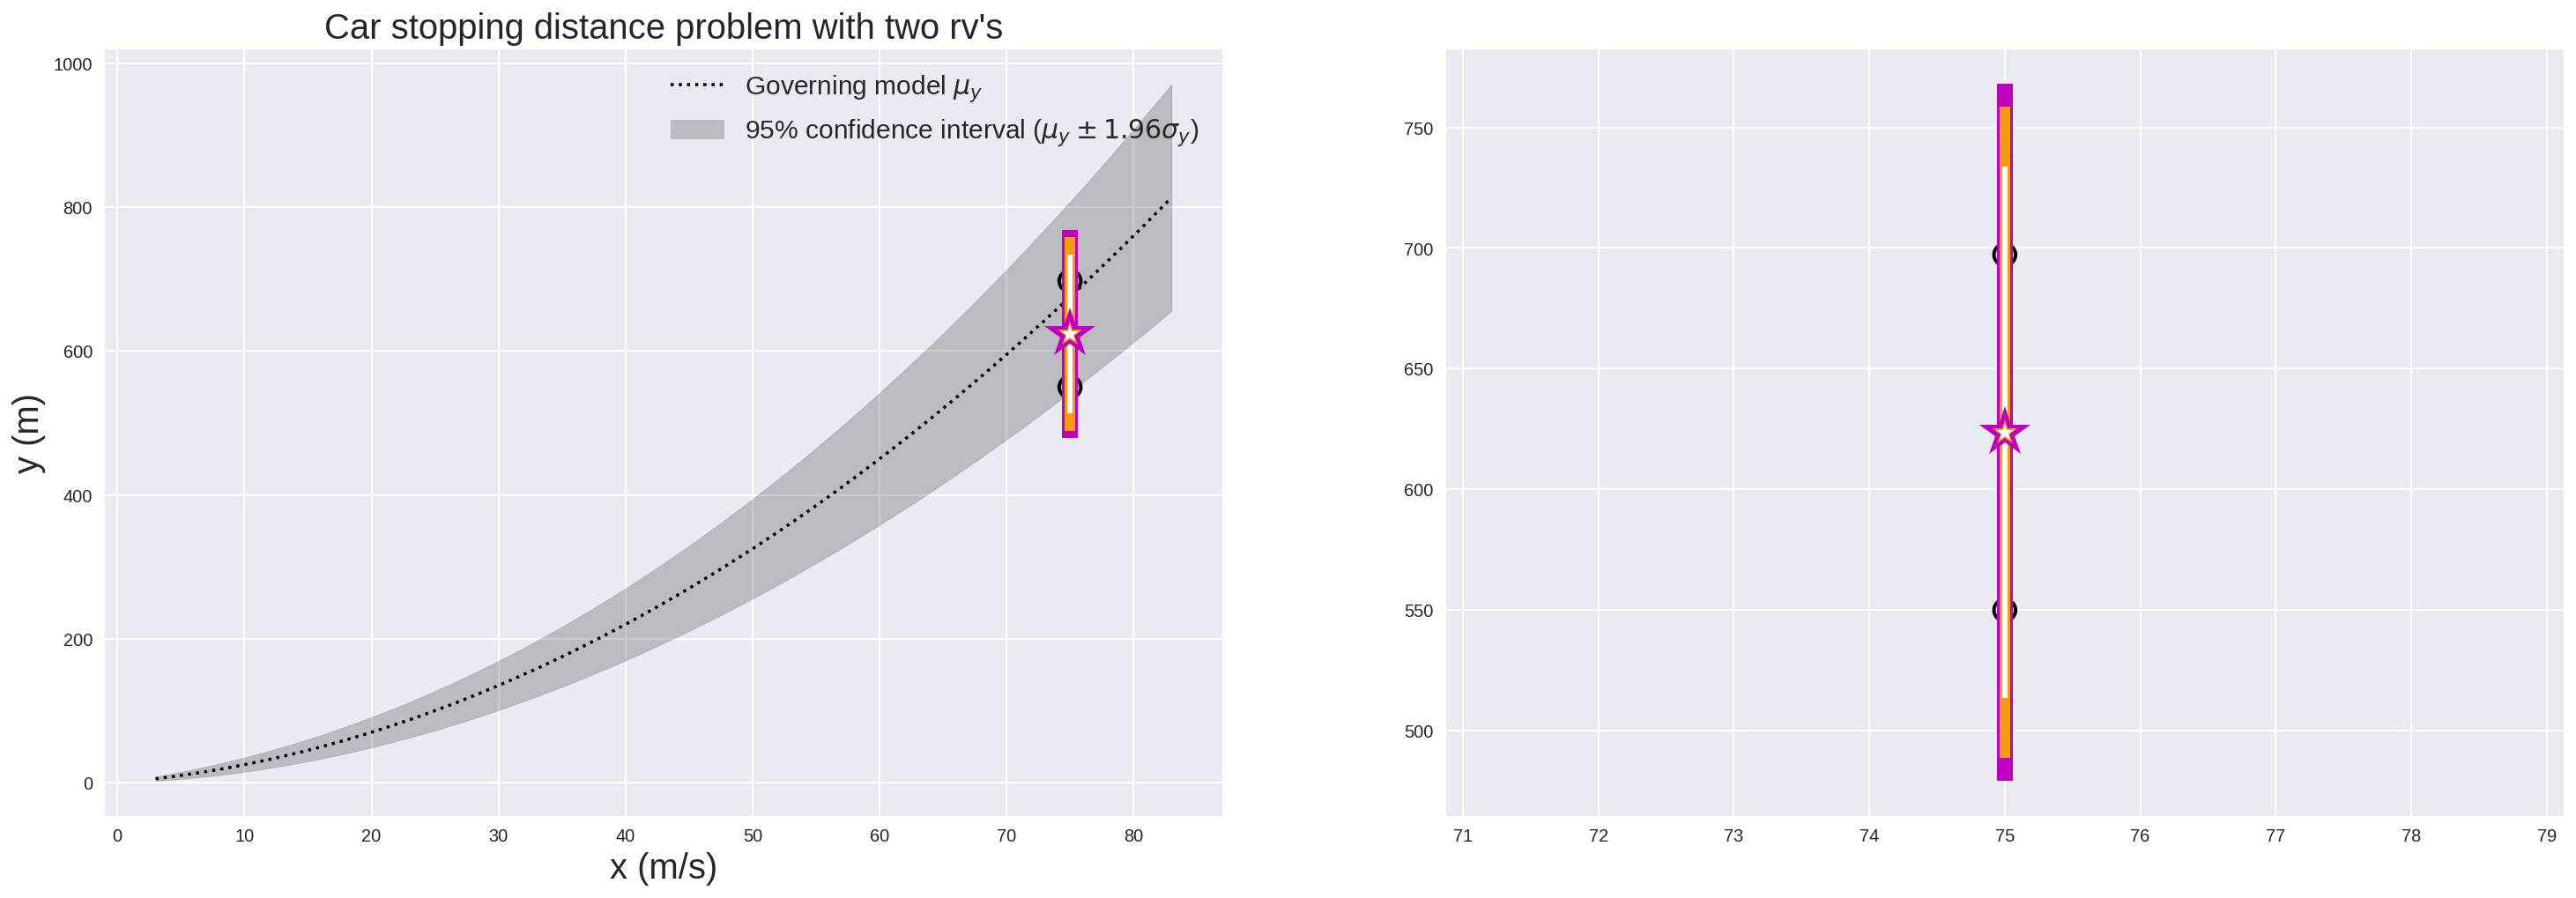

In [11]:
MLE_versus_Bayesian_PPD_for_UniformPrior(N_samples=2)

"Teaser": PPD obtained with the MLE **versus** PPD obtained in Lecture 7 (Gaussian prior)

In [12]:
# This cell is hidden during presentation
def MAP_versus_Bayesian_PPD_for_GaussianPrior(N_samples):
    fig_car_PPD_GaussianPrior, ax_car_PPD_GaussianPrior = plt.subplots(1,2)
    x = 75
    mu_z2 = 0.1; sigma_z2 = 0.01
    # Observation of N_samples from the true data:
    empirical_y = samples_y_with_2rvs(N_samples, x) # Empirical measurements of N_samples at x=75
    # Empirical mean and std directly calculated from observations:
    empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); 
    #
    # --------------------------------------------------------------------------------------------
    # PPD calculated in Lecture 7 (Gaussian prior)
    w = x
    b = mu_z2*x**2
    sigma_yGIVENz = np.sqrt((x**2*sigma_z2)**2) # sigma_y|z (comes from the stochastic influence of the z_2 rv)
    sigma = np.sqrt(sigma_yGIVENz**2/(w**2*N_samples)) # std arising from the likelihood
    mu = empirical_mu_y/w - b/w # mean arising from the likelihood (product of Gaussian densities for the data)
    #
    mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution 
    sigma_posterior_z = np.sqrt( (sigma_prior_z**2*sigma**2)/(sigma_prior_z**2+sigma**2) )# std of posterior
    mu_posterior_z = sigma_posterior_z**2*( mu/(sigma**2) + mu_prior_z/(sigma_prior_z**2) ) # mean of posterior
    PPD_mu_y_GaussianPrior = mu_posterior_z*w + b
    PPD_sigma_y_GaussianPrior = np.sqrt(w**2*sigma_posterior_z**2+sigma_yGIVENz**2)
    # --------------------------------------------------------------------------------------------
    
    
    # --------------------------------------------------------------------------------------------
    # MAP:
    z_map = mu_posterior_z # in this case it also coincides with the mean of the posterior
    PPD_mu_y_map = w*z_map + b # same as empirical mean (also same as mean of Bayesian PPD for Uniform prior)
    PPD_sigma_y_map = sigma_yGIVENz # NOT the same as Bayesian PPD for Uniform prior (only in the limit)
    # --------------------------------------------------------------------------------------------

    #
    car_fig_2rvs(ax_car_PPD_GaussianPrior[0]) # a function I created to include the background plot of the governing model
    for i in range(2): # create two plots (one is zooming in on the error bar)
        ax_car_PPD_GaussianPrior[i].errorbar(x , empirical_mu_y,yerr=1.96*empirical_sigma_y, fmt='m*',
                               markersize=30, elinewidth=9);
        ax_car_PPD_GaussianPrior[i].errorbar(x , PPD_mu_y_GaussianPrior,yerr=1.96*PPD_sigma_y_GaussianPrior,
                               fmt='b*', markersize=15, elinewidth=6);
        ax_car_PPD_GaussianPrior[i].errorbar(x , PPD_mu_y_map,yerr=1.96*PPD_sigma_y_map,
                               fmt='c*', markersize=10, elinewidth=3);
        ax_car_PPD_GaussianPrior[i].scatter(x*np.ones_like(empirical_y),empirical_y, s=150,facecolors='none',
                              edgecolors='k', linewidths=2.0)
    print("PPD with Gaussian Prior mean[y] = ",PPD_mu_y_GaussianPrior, "& empirical mean[y] = ",empirical_mu_y, "(real mean[y]=675)")
    print("PPD with Gaussian Prior std[y] = ",PPD_sigma_y_GaussianPrior, "& empirical std[y] is",empirical_sigma_y,"(real std[y]=67.6)")
    print("PPD from MAP mean[y] = ",PPD_mu_y_map, "& empirical mean[y] = ",empirical_mu_y, "(real mean[y]=675)")
    print("PPD from MAP std[y] = ",PPD_sigma_y_map, "& empirical std[y] is",empirical_sigma_y,"(real std[y]=67.6)")
    fig_car_PPD_GaussianPrior.set_size_inches(25, 8) # scale figure to be wider (since there are 2 subplots)

PPD with Gaussian Prior mean[y] =  698.2342039249004 & empirical mean[y] =  691.9577026383698 (real mean[y]=675)
PPD with Gaussian Prior std[y] =  68.13343298103378 & empirical std[y] is 11.781124082546285 (real std[y]=67.6)
PPD from MAP mean[y] =  698.2342039249004 & empirical mean[y] =  691.9577026383698 (real mean[y]=675)
PPD from MAP std[y] =  56.25 & empirical std[y] is 11.781124082546285 (real std[y]=67.6)


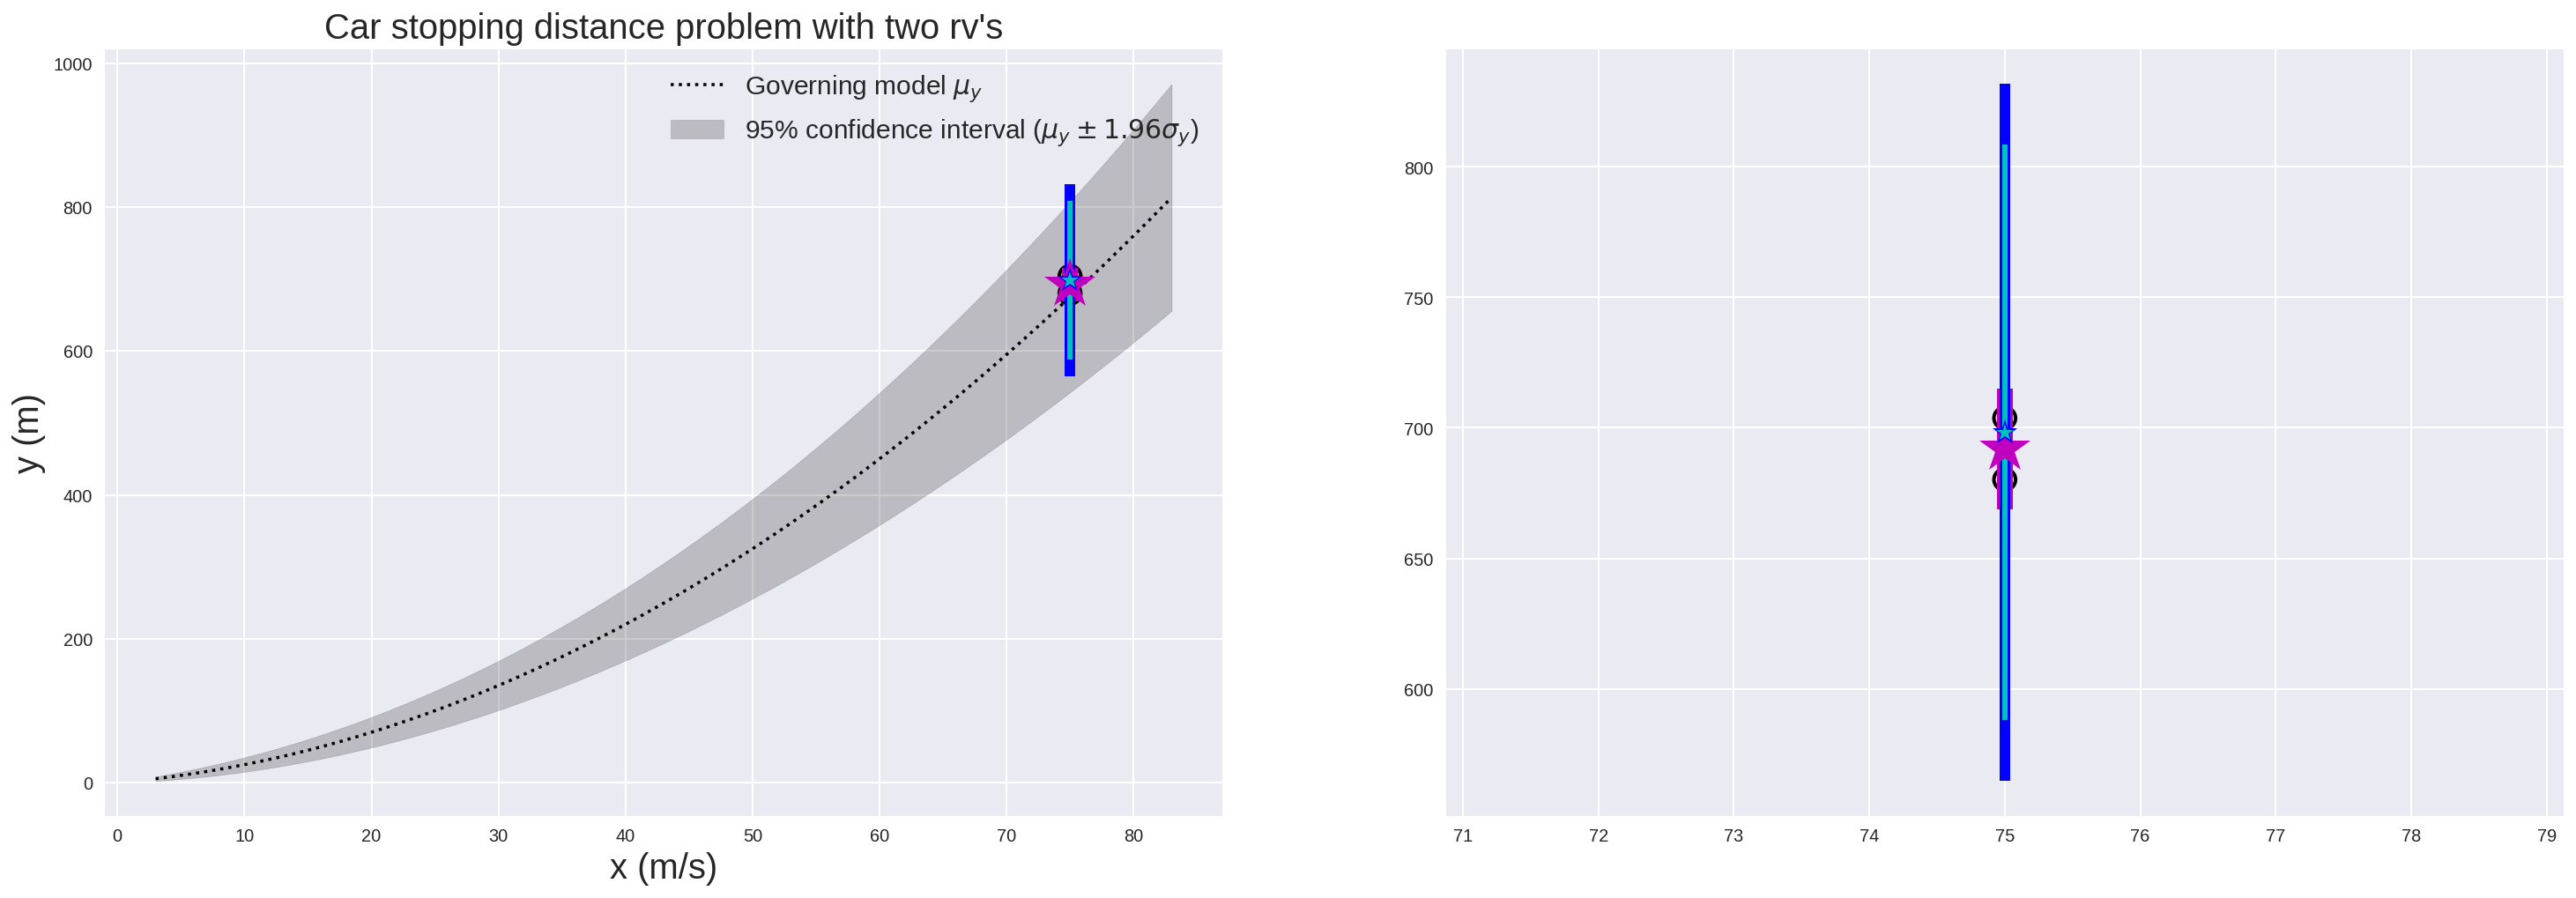

In [13]:
MAP_versus_Bayesian_PPD_for_GaussianPrior(N_samples=2)

## Final reflection: what strategy should we choose?

Approximating the PPD using a Point estimate is usually much simpler and faster than marginalizing unknown rv's such as $z$ (integrals!).

This is true analytically as well as numerically.

This explains why many ML practitioners choose Point estimates like MLE or MAP.

But in general the predictions of the PPD have different robustness:

* PPD calculated from Posterior distribution > PPD from Point estimates
    - We can also say that within the Point estimates: Posterior mean estimate > MAP > MLE

We will see evidence in favor of this in the remaining of the course.

## Final reflection: Bayesian versus non-Bayesian perspective on ML

We can do one last simplification (but it can **mislead** us into believing that ML is not probabilistic!)

When the <font color='orange'>PPD</font> is approximated by the observation distribution for a Point estimate $\hat{z}$,

$$\require{color}
{\color{orange}p(y|\mathcal{D}_y)} = p(y|z=\hat{z})
$$

we can decide to focus on only making a prediction for the **mean** of the PPD and even forget that it is a distribution (we forget uncertainties!).

This is very common in ML literature! But, I think it's advantageous not to think about it that way...


### See you next class

Have fun **<font color='red'>but do your HOMEWORK**</font>!